In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
print(df_train.shape)
print(df_test.shape)
df_train.head()

(42000, 785)
(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
y.value_counts().sort_index()

0    494
1    558
2    545
3    480
4    477
5    469
6    516
7    506
8    477
9    478
Name: label, dtype: int64

(42000, 28, 28) (42000,)
(28000, 28, 28)


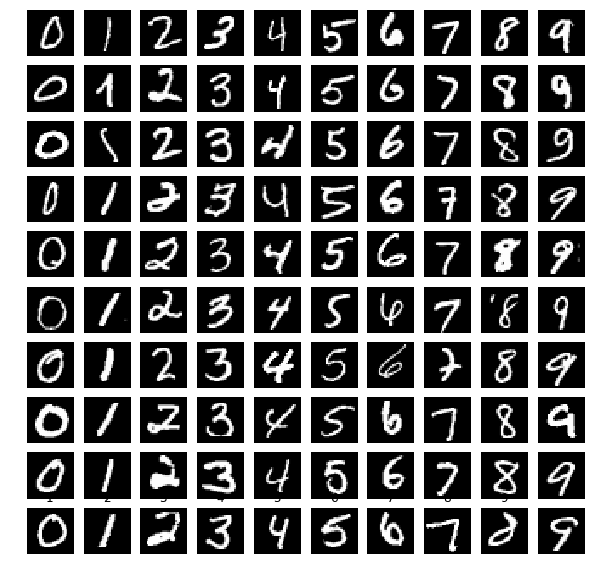

In [102]:
num_samples = 42000
X = df_train.iloc[0:num_samples, 1:]
X = X.values.reshape(num_samples, 28, 28)
X_test = df_test.values
X_test = X_test.reshape(X_test.shape[0], 28, 28)
y = df_train.iloc[0:num_samples, 0]
print(X.shape, y.shape)
print(X_test.shape)
# 设定每幅图大小
plt.figure(figsize=(10,10))
for j, cls in enumerate(np.sort(y.unique())):
    # 返回y==j矩阵中不为零的index
    idxs = np.flatnonzero(y == j)
    idxs = np.random.choice(idxs, 10, replace=False)
    for i, idx in enumerate(idxs):
        if i == 0:
            plt.title(cls)
        plt_idx = i * 10 + j + 1
        # 指明图片放在哪个位置
        plt.subplot(10, 10, plt_idx)
        plt.imshow(X[idx].astype('uint8'), cmap='gray')
        # 不加坐标
        plt.axis('off')


C:\Users\13802\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(33600, 28, 28) (8400, 28, 28) (8400,) (8400,)


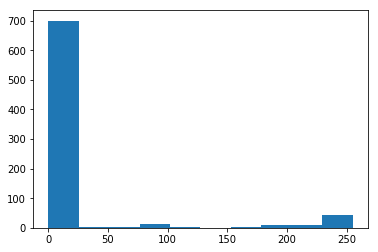

In [103]:
plt.hist(X[0].flatten())
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8)
print(X_train.shape, X_val.shape, y_val.shape, y_val.shape)

(-0.5, 27.5, 27.5, -0.5)

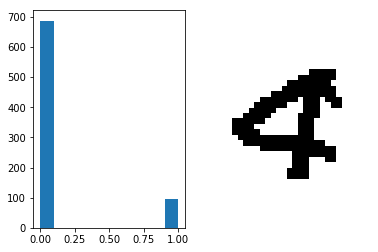

In [104]:
from sklearn.svm import SVC
svc = SVC(C=50)
X_svc = X.copy()
X_svc[X_svc>0] = 1
X_test_svc = X_test.copy()
X_test_svc[X_test_svc>0] = 1
plt.subplot(1,2,1)
plt.hist(X_svc[0].flatten())
plt.subplot(1,2,2)
plt.imshow(X_svc[43], cmap='binary')
plt.axis('off')

(28000, 28, 28)


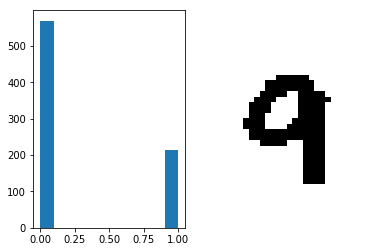

In [105]:
plt.subplot(1,2,1)
plt.hist(X_test_svc[0].flatten())
plt.subplot(1,2,2)
plt.imshow(X_test_svc[43], cmap='binary')
plt.axis('off')
print(X_test_svc.shape)

svc_cv = cross_val_score(svc, np.reshape(X_svc, (num_samples, -1)), y)
svc_cv_mean = svc_cv.mean()
print('\nsvc:\n', svc_cv, '\n', svc_cv_mean)

In [107]:
svc.fit(np.reshape(X_svc, (num_samples, -1)), y)


SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
pred_y = svc.predict(np.reshape(X_test_svc, (28000, -1)))